Import Libraries

In [71]:
import pandas as pd  #for data analysis and manipulation->like loading datasets, handling dataframes, cleaning, and preprocessing.
import numpy as np  #for numerical operations, arrays, and mathematical functions.
import matplotlib.pyplot as plt  #for creating static, animated, and interactive visualizations->provides functions like plot(), show(), hist(), etc
import seaborn as sns  #A data visualization library built on top of matplotlib->It provides high-level functions to create attractive and informative statistical graphics (heatmaps, boxplots, etc.)
import warnings # helps manage warning messages-> Useful to suppress unnecessary warnings during data analysis
warnings.filterwarnings('ignore')

# Step 1:EDA/Visualizations

1: Load Dataset

In [72]:
# To Load the CSV files
df = pd.read_csv('/content/telecommunications_churn (1).csv')

In [73]:
print("Shape (rows, columns):", df.shape)

Shape (rows, columns): (3333, 19)


2: Basic Info about Data

In [74]:
print("\nColumns in dataset:\n", df.columns.tolist())
print("\nData Types:\n")
print(df.dtypes)
print("\n Missing Values:\n")
print(df.isnull().sum())


Columns in dataset:
 ['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins', 'evening_mins', 'night_mins', 'international_mins', 'customer_service_calls', 'international_plan', 'day_calls', 'day_charge', 'evening_calls', 'evening_charge', 'night_calls', 'night_charge', 'international_calls', 'international_charge', 'total_charge', 'churn']

Data Types:

account_length              int64
voice_mail_plan             int64
voice_mail_messages         int64
day_mins                  float64
evening_mins              float64
night_mins                float64
international_mins        float64
customer_service_calls      int64
international_plan          int64
day_calls                   int64
day_charge                float64
evening_calls               int64
evening_charge            float64
night_calls                 int64
night_charge              float64
international_calls         int64
international_charge      float64
total_charge              float64
churn         

In [75]:
df.isna().sum() #Checking any NAN or NA value is there or not

,0
account_length,0
voice_mail_plan,0
voice_mail_messages,0
day_mins,0
evening_mins,0
night_mins,0
international_mins,0
customer_service_calls,0
international_plan,0
day_calls,0


In [76]:
# Show first 5 rows
print("\nFirst 5 rows of dataset:\n")
display(df.head())


First 5 rows of dataset:



,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0


In [77]:
# Check duplicate rows
print("\nDuplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0


3: Separate columns

In [78]:
# Binary categorical columns
binary_cat_cols = ['voice_mail_plan', 'international_plan', 'churn']
print(" Binary categorical columns:", binary_cat_cols)

 Binary categorical columns: ['voice_mail_plan', 'international_plan', 'churn']


In [79]:
# discrete numerical variable (but often treated as categorical in EDA).
# Tree-based models (Random Forest, XGBoost, LightGBM) → keep it as numerical.They’ll automatically learn rules like “if customer_service_calls ≥ 4 → churn probability increases”.
# Linear models (Logistic Regression, SVM, etc.) → better to one-hot encode it (treat as categorical). This avoids forcing a straight-line relationship between calls and churn.
discrete_cat_cols = ['customer_service_calls']
print("Discrete categorical columns:", discrete_cat_cols)

Discrete categorical columns: ['customer_service_calls']


In [80]:
# Continuous numerical columns
num_cols = [col for col in df.columns if col not in binary_cat_cols + discrete_cat_cols]
print("Continuous numerical columns:", num_cols)

Continuous numerical columns: ['account_length', 'voice_mail_messages', 'day_mins', 'evening_mins', 'night_mins', 'international_mins', 'day_calls', 'day_charge', 'evening_calls', 'evening_charge', 'night_calls', 'night_charge', 'international_calls', 'international_charge', 'total_charge']


4. Summary statistics

In [81]:
print("\n Summary Statistics for Continuous Numerical Features:\n")
display(df[num_cols].describe().T)


 Summary Statistics for Continuous Numerical Features:



,count,mean,std,min,25%,50%,75%,max
account_length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
voice_mail_messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
day_mins,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
evening_mins,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
night_mins,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00
international_mins,3333.0,10.237294,2.791840,0.00,8.50,10.30,12.10,20.00
day_calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
day_charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
evening_calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
evening_charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91


In [82]:
print("\nFrequency Counts for Binary Categorical Features:\n")
for col in binary_cat_cols:
    counts = df[col].value_counts().to_dict()
    print(f"{col}: {counts}")


Frequency Counts for Binary Categorical Features:

voice_mail_plan: {0: 2411, 1: 922}
international_plan: {0: 3010, 1: 323}
churn: {0: 2850, 1: 483}


In [83]:
print("\nFrequency Counts for Discrete Categorical Features:\n")
for col in discrete_cat_cols:
    counts = df[col].value_counts().sort_index().to_dict()  # sort_index for ascending order
    print(f"{col}: {counts}\n")


Frequency Counts for Discrete Categorical Features:

customer_service_calls: {0: 697, 1: 1181, 2: 759, 3: 429, 4: 166, 5: 66, 6: 22, 7: 9, 8: 2, 9: 2}



5.Visualization

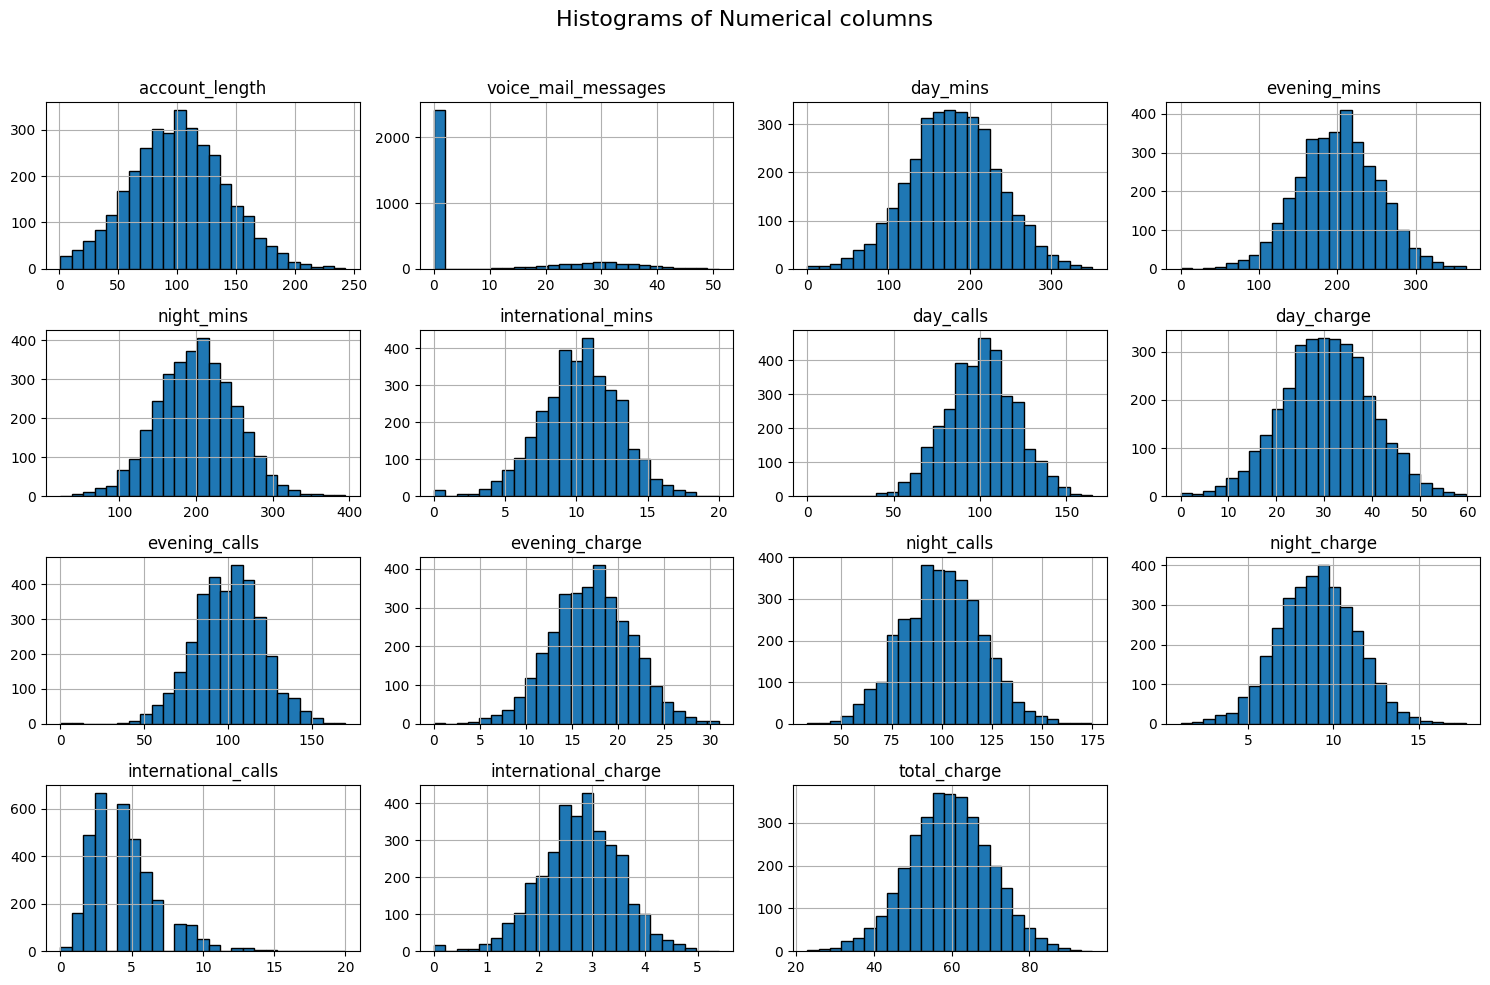

In [84]:
# Continuous numerical columns
df[num_cols].hist(figsize=(15, 10), bins=25, edgecolor='black')
plt.suptitle("Histograms of Numerical columns", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for suptitle
plt.show()

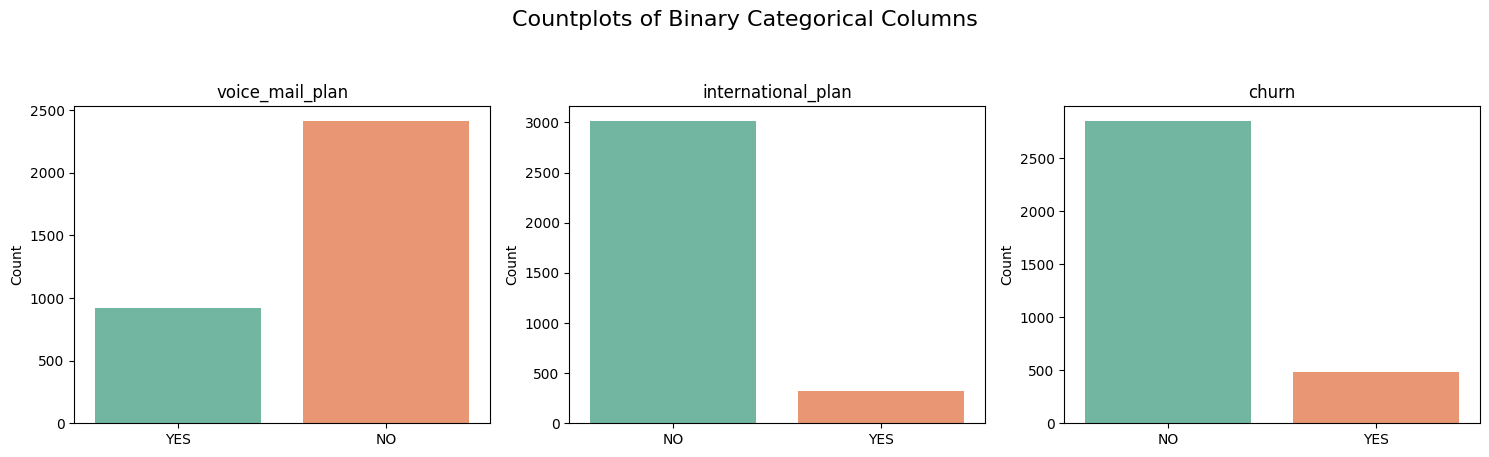

In [85]:
#Countplot (Bar plot) for binary categorical columns [0-->NO, 1-->YEs]
plt.figure(figsize=(15, 8))

for i, col in enumerate(binary_cat_cols, 1):
    plt.subplot(len(binary_cat_cols)//3 + 1, 3, i)  # arrange in grid (3 per row)

    # Map 0 and 1 to 'NO' and 'YES' for the plot
    mapped_values = df[col].map({0: 'NO', 1: 'YES'})

    sns.countplot(x=mapped_values, palette="Set2")
    plt.title(f"{col}")
    plt.xlabel("")   # remove x-label (optional)
    plt.ylabel("Count")

plt.suptitle("Countplots of Binary Categorical Columns", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # adjust layout for suptitle
plt.show()

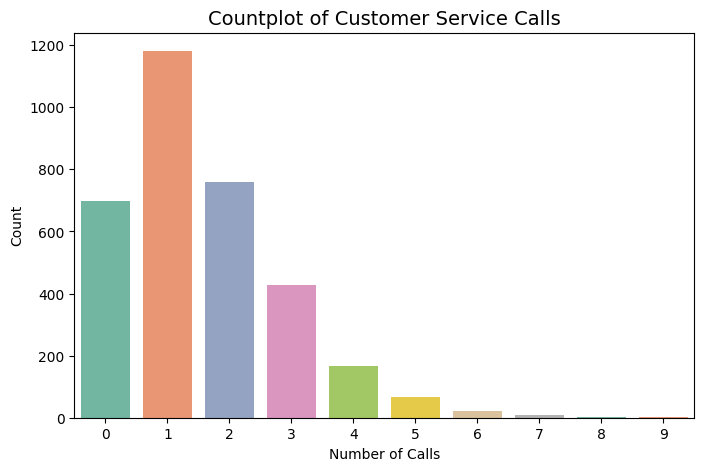

In [86]:
#Countplot (Bar plot) for discrete numerical variable
#Values range from 0 → 9 (integers).
#These are counts of calls (a small finite set of discrete numbers).
plt.figure(figsize=(8,5))
sns.countplot(x=df["customer_service_calls"], palette="Set2")
plt.title("Countplot of Customer Service Calls", fontsize=14)
plt.xlabel("Number of Calls")
plt.ylabel("Count")
plt.show()

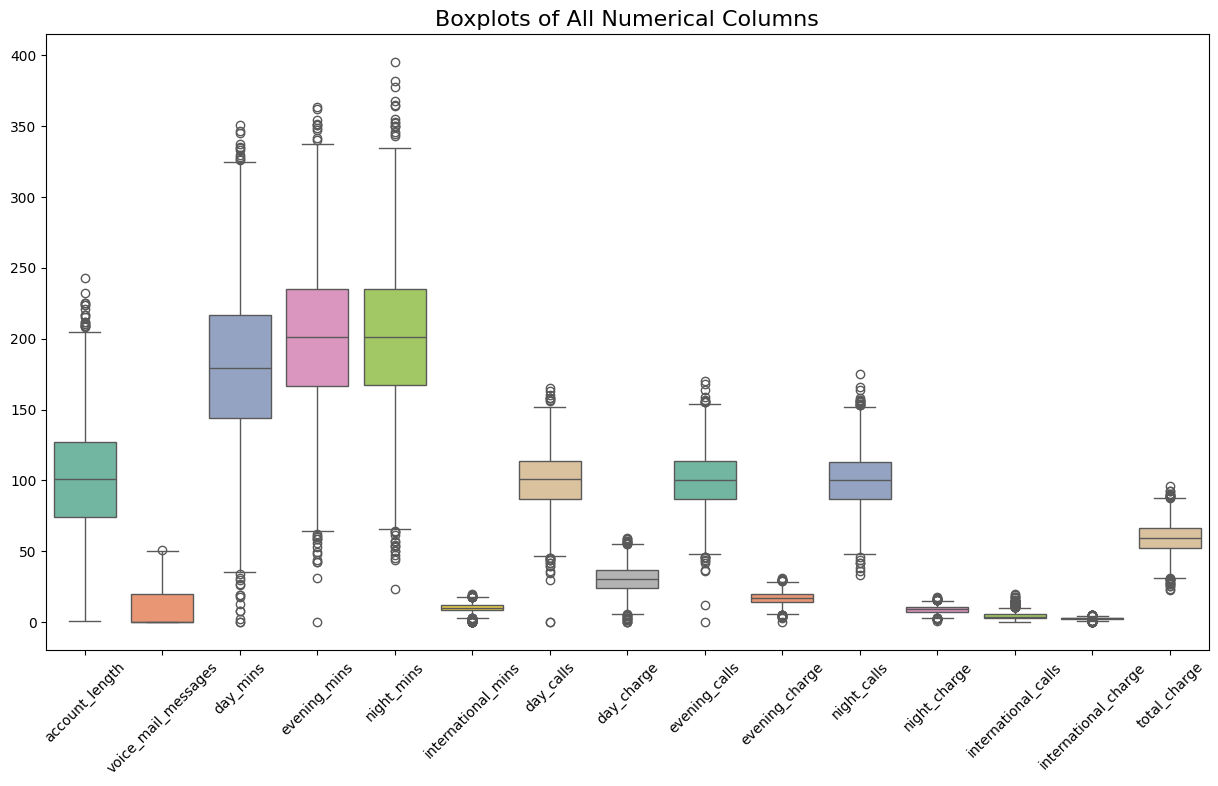

In [87]:
# Boxplots for numerical features (detect outliers)
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[num_cols], palette="Set2")
plt.title("Boxplots of All Numerical Columns", fontsize=16)
plt.xticks(rotation=45)
plt.show()

#Bivariate Analysis

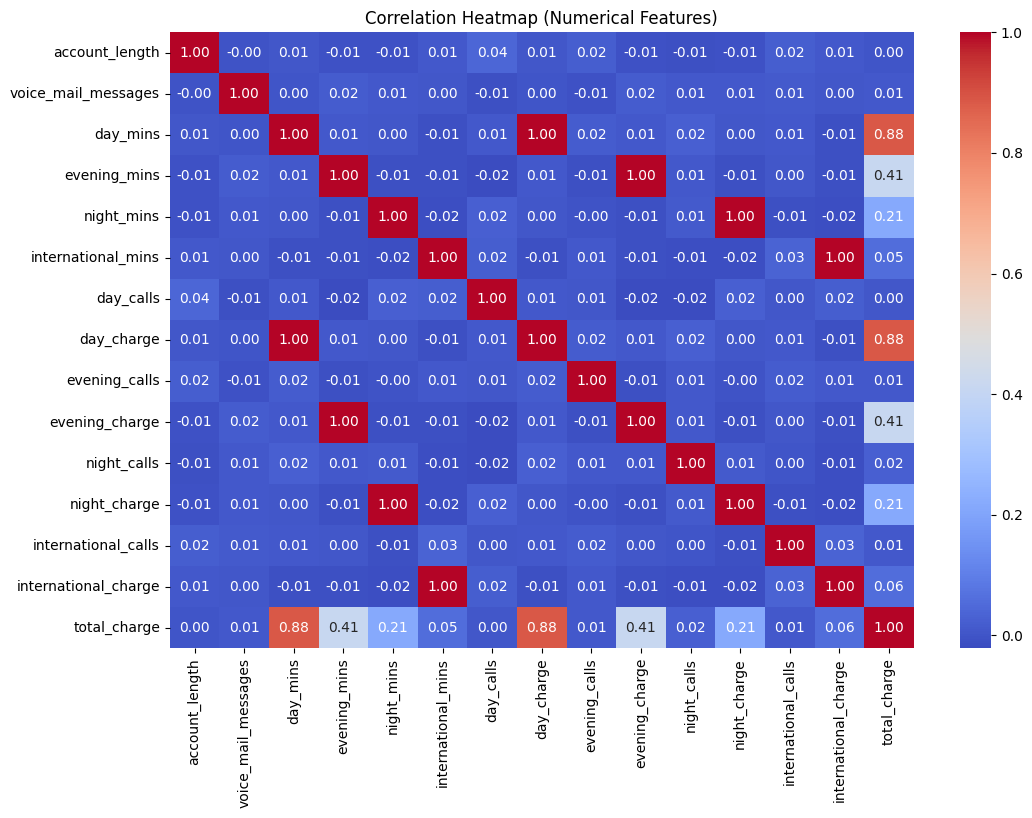

In [88]:
# Step : Correlation heatmap (only numerical columns)
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

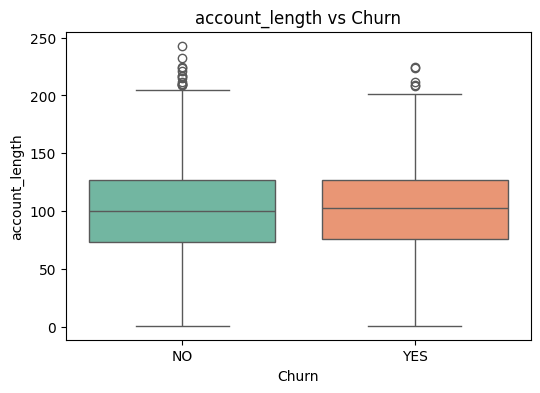

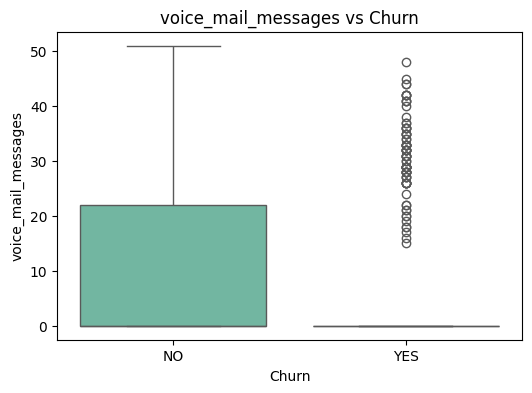

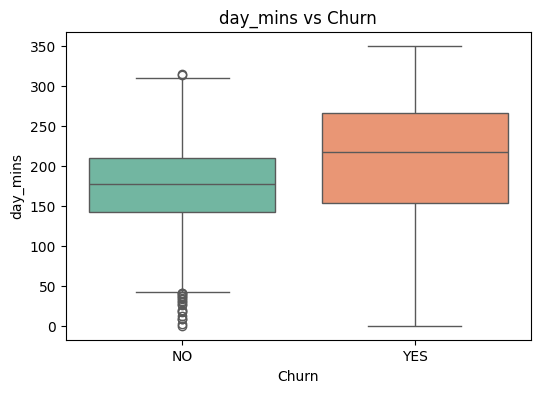

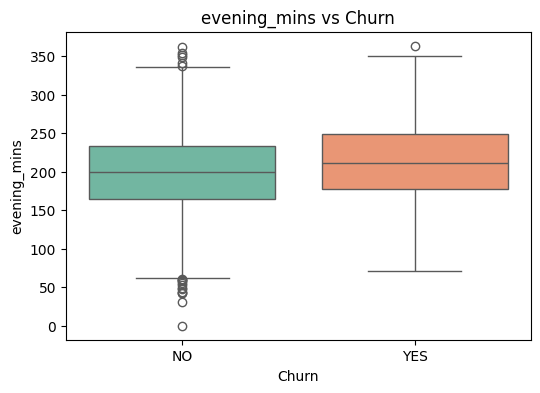

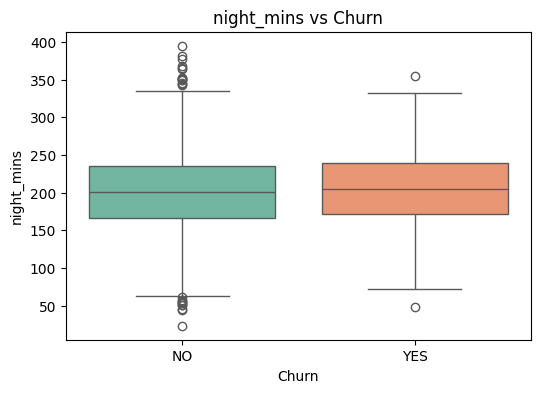

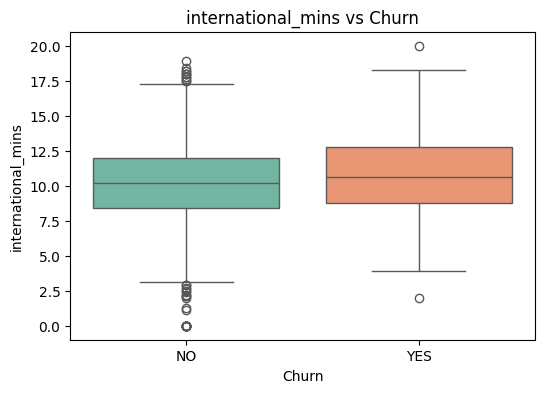

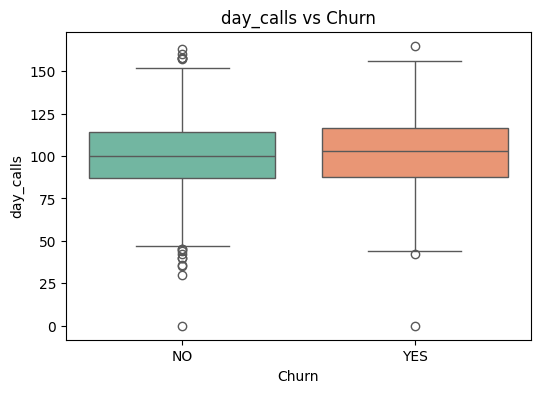

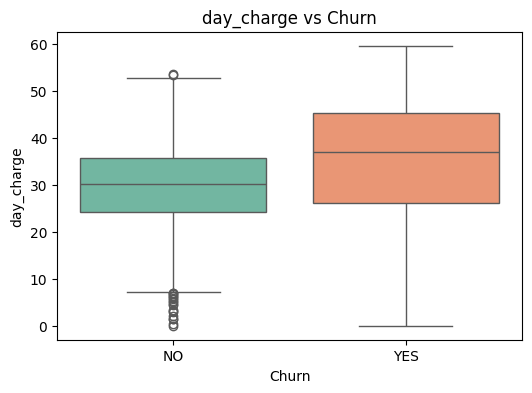

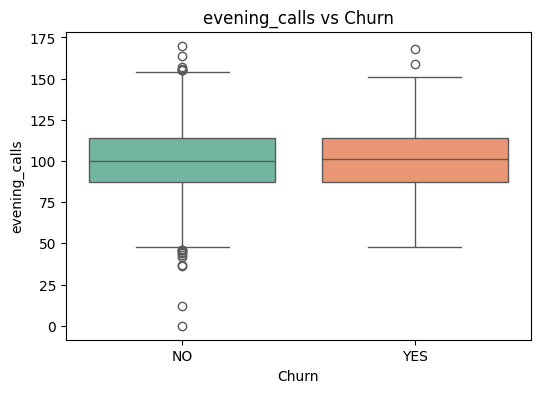

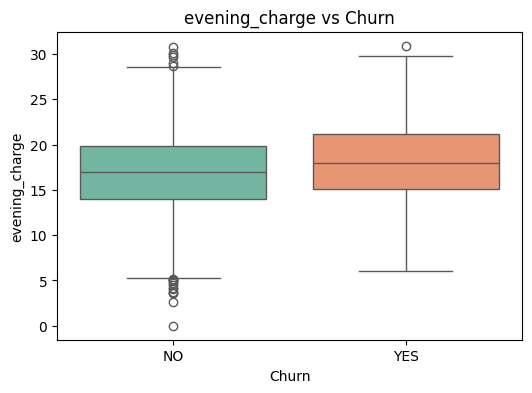

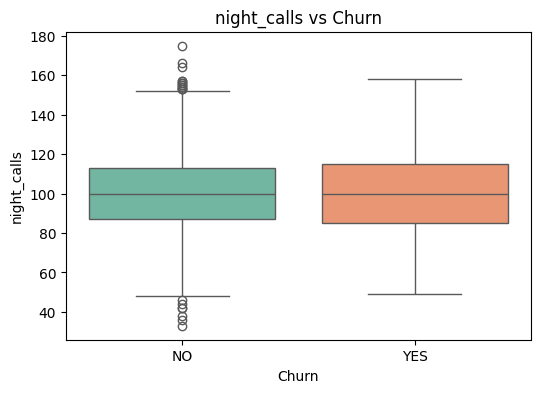

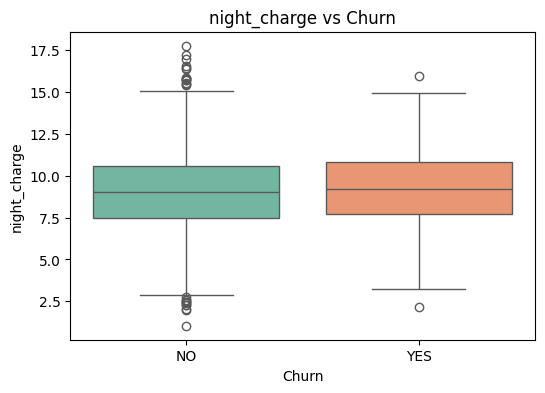

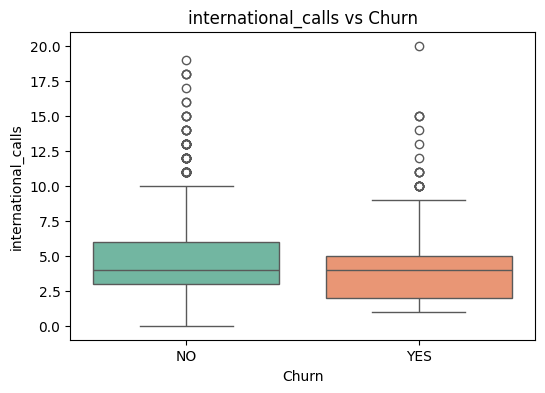

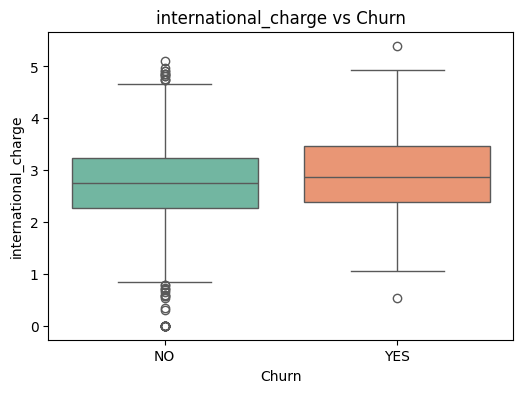

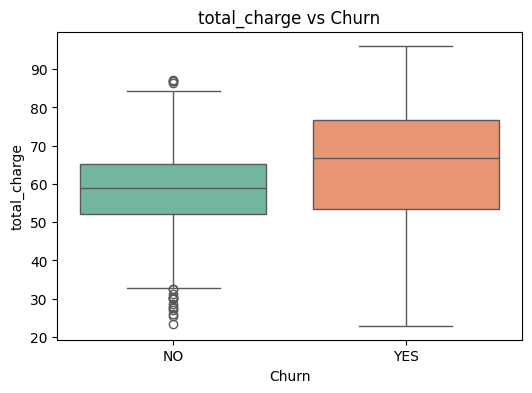

In [89]:
# Numerical vs Churn (boxplots) with labels 0->NO, 1->YES #box represents the distribution of Numerical columns for that churn category.
churn_mapping = {0: 'NO', 1: 'YES'}
target_col = "churn" #Churn is our target column
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[target_col].map(churn_mapping), y=df[col], palette="Set2")
    plt.title(f"{col} vs Churn")
    plt.xlabel("Churn")
    plt.show()

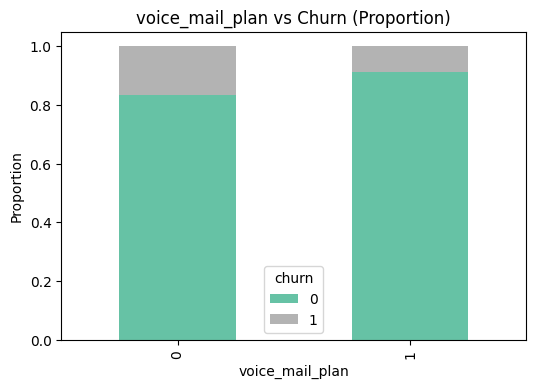

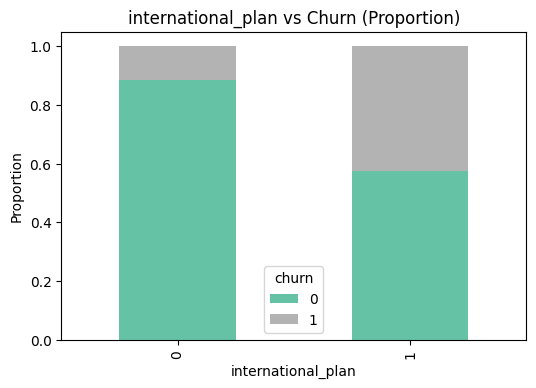

In [90]:
# Categorical vs Churn (stacked bar plots)
for col in binary_cat_cols:
    if col != target_col:
        ct = pd.crosstab(df[col], df[target_col], normalize="index")
        ct.plot(kind="bar", stacked=True, figsize=(6,4), colormap="Set2")
        plt.title(f"{col} vs Churn (Proportion)")
        plt.ylabel("Proportion")
        plt.show()

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [92]:

# Prepare features and target
X = df.drop('churn', axis=1).select_dtypes(include=['number'])
y = df['churn']
y = y.loc[X.index]

In [93]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define models with scaling where needed
models = {
    "SVM": make_pipeline(StandardScaler(), SVC()),
    "KNN": make_pipeline(StandardScaler(), KNeighborsClassifier()),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Store accuracy results
accuracy_results = {}
reports = {}

In [94]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_results[name] = acc
    reports[name] = classification_report(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(f"{name} Classification Report:\n{reports[name]}")


SVM Accuracy: 0.9145
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       570
           1       0.83      0.52      0.64        97

    accuracy                           0.91       667
   macro avg       0.88      0.75      0.79       667
weighted avg       0.91      0.91      0.91       667


KNN Accuracy: 0.8936
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       570
           1       0.78      0.37      0.50        97

    accuracy                           0.89       667
   macro avg       0.84      0.68      0.72       667
weighted avg       0.88      0.89      0.88       667


Decision Tree Accuracy: 0.9460
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       570
           1       0.84      0.78      0.81        97

    accuracy   

In [95]:
#Convert results to DataFrame
results_df = pd.DataFrame.from_dict(accuracy_results, orient='index', columns=['Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)

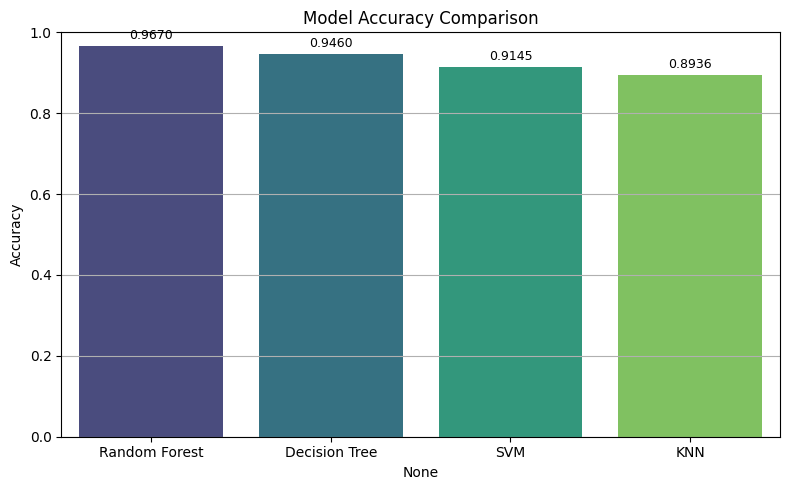


 Best Model: Random Forest with Accuracy = 0.9670


In [103]:
# Barplot of model accuracy
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=results_df.index, y=results_df['Accuracy'], palette='viridis')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=0)  # Keep model names horizontal for clarity
plt.grid(axis='y')
plt.tight_layout()

# Annotate each bar with its accuracy value
for bar in ax.patches:
    acc = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        acc + 0.01,
        f"{acc:.4f}",
        ha='center',
        va='bottom',
        fontsize= 9,
        color='black'
    )

plt.show()

# Identify best model
best_model = results_df.idxmax().values[0]
best_accuracy = results_df.max().values[0]
print(f"\n Best Model: {best_model} with Accuracy = {best_accuracy:.4f}")
